# Exercices : à vous de jouer !


In [1]:
# On commence par les imports
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : approximation d'une intégrale par méthode de Monte-Carlo.
1. Calculez $I=\int_0^1 \frac{p^2}{4} dp$.
2. Remplissez un tableau `A` de 10000 couples $(p,q)$ issus d'une loi uniforme sur l'intervalle $[0,1]$.
3. Calculez la proportion $\tilde{I}$ des couples $(p,q)$ qui vérifient $q < \frac{p^2}{4}$ (on créera un tableau 1D de taille 10000 contenant 0 ou 1 selon que la condition est vérifiée ou pas, puis sommer tous les termes de ce tableau).
4. Sur une fenêtre graphique, représentez EN ROUGE les points situés en dessous de la courbe $q=\frac{p^2}{4}$ et en VERT les autres.
5. Concluez.


## Exercice 1 - vos réponses...

1. $I=\int_0^1 \frac{p^2}{4} dp = \left[\frac{p^3}{12}\right]_0^1=\frac{1}{12}\approx 0.083$
2. Voir code ci-dessous.
3. Voir code ci-dessous.
4. Voir code ci-dessous.
5. L'intégrale $I$ est l'aire sous la courbe représentative de la fonction $q=\frac{p^2}{4}$. La proportion de points rouges est proche de l'aire sous la courbe divisée par l'aire totale du carré (qui vaut 1). Ainsi, la proportion des points rouge $\tilde{I}$ est une valeur approximative de l'intégrale $I$.

I_tilde = 0.0826


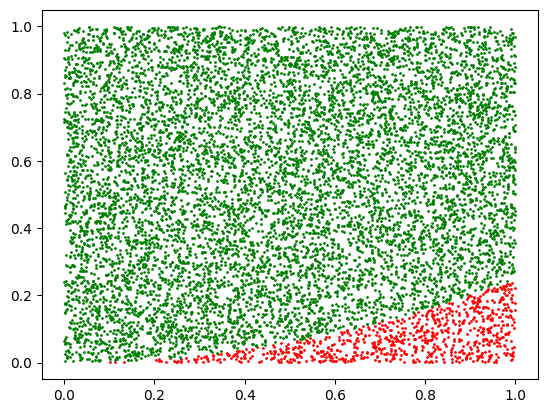

In [2]:
# Question 2
A = np.random.rand(10000,2)

# Question 3
tests = A[:,1] < A[:,0]**2/4
I_tilde = tests.sum() / tests.shape[0]
print(f"I_tilde = {I_tilde}")

# Question 4
fig, ax = plt.subplots()
ax.scatter(A[tests==1,0], A[tests==1,1],c='r',s=1)
ax.scatter(A[tests==0,0], A[tests==0,1],c='g',s=1)





## Exercice 2
On s'intéresse aux solutions de l'équation $x^2+px+q=0$. Supposons que $(p,q)$ sont des nombres aléatoires issus d'une loi uniforme sur $[0,1]$ (comme précédemment).
1. Intuitivement, quelle est la loi de probabilité suivie par le nombre de solutions d'une équation du second degré. Autrement dit, si $X$ désigne la variable aléatoire égale au nombre de solution de l'équation $x^2+px+q=0$, que valent les probabilités $P(X=0)$, $P(X=1)$ et $P(X=2)$.
2. Voyez-vous un lien avec l'exercice précédent ?
3. Ecrivez une fonction `binome(p,q)` qui permet de calculer le nombre de solutions distinctes de l'équation $x^2+px+q = 0$. 
4. Pour chaque couple du tableau `A` (de l'exercice précédent), stockez le nombre de solutions dans un tableau `S`.
5. Calculez les proportions de triplets qui conduisent à 0, 1 ou 2 solutions (on pourra par exemple utiliser `(S==1).sum()` pour calculer le nombre de couples correspondants à 1 solution). Cela confirme-t-il votre intuition ?


## Exercice 2 - vos réponses...

1. Tout dépend du discriminant $\Delta$. On se doute que $P(X=1)$ est faible car il faut que $\Delta = 0$. On pourrait imaginer que $P(X=0)$ et $P(X=2)$ sont du même ordre (il faut que $\Delta <0$ et $\Delta > 0$ respectivement).
2. Il y a un lien. $\Delta > 0 \leftrightarrow p^2-4q > 0 \leftrightarrow q < \dfrac{p^2}{4}$. Ainsi tous les couples pour lesquels il y a 2 solutions correspondent aux points du carré situés sous la courbe représentative de la fonction $\dfrac{p^2}{4}$. Ainsi, $P(X=2) = I$.
3. Voir code ci-dessous.
4. Voir code ci-dessous.
5. Voir code ci-dessous. Le résultat obtenu est contraire à l'intuition de départ. Il y a beaucoup plus de cas qui n'ont aucune solution que de cas qui en ont 2. Quand au nombre de cas qui n'ont pas de solutions, ils sont presque nuls.

In [3]:
# Question 3
def binome(p,q):
    delta = p**2 - 4*q
    if delta == 0:
        return 1
    elif delta < 0:
        return 0
    else:
        return 2
    
# Question 4
S = np.zeros(10000).astype(np.uint8)
for i in range(10000):
    p = A[i,0]
    q = A[i,1]
    S[i] = binome(A[i,0],A[i,1])

# Question 5
nb0 = (S==0).sum()
nb1 = (S==1).sum()
nb2 = (S==2).sum()

f0 = nb0 / 10000
f1 = nb1 / 10000
f2 = nb2 / 10000

print(f"P(X=0) = {f0}\n")
print(f"P(X=1) = {f1}\n")
print(f"P(X=2) = {f2}\n")

P(X=0) = 0.9174

P(X=1) = 0.0

P(X=2) = 0.0826



## Exercice 3
Dans cet exercice, on étudie le comportement l'influence du type des éléments d'un tableau sur le résultats de certaines opérations élémentaires.
1. Créez deux tableaux `numpy` 1d, `l1` et `l2`, contenant les 10 premiers entiers 0, 1, 2,..., 9 (utilisez la commande `np.arange()`).
2. Convertissez `l1` en type `np.uint8`(8-bit) et `l2` en type `np.float32` (utilisez `l1.astype()`...).
3. 
    - Cas 1. Multipliez chacune des deux listes par 30.: `l1_bis = l1*30.` et `l2_bis = l2 * 30.` (respectez scrupuleusement les instructions précédentes). Le résultat est-il conforme à ce que vous attendiez ? Quel est le type des éléments de `l1_bis` ? 
    - Cas 2 : Multipliez chacune des deux listes par 30: `l1_ter = l1*30` et `l2_ter = l2 * 30` (notez la différence). Que se passe-t-il ? Le résultat obtenu pour `l1` est-il conforme à ce que vous attendiez ?
4. Faites plusieurs tests (avec un tableau d'une seule valeur) pour comprendre ce qu'il se passe. Commentez.

Remarque : cet exercice sera important pour les TP suivants. La plupart des images que vous manipulerez seront codées sur 8-bits, mais les opérations entraineront 


## Exercice 3 - vos réponses...

1. Voir code ci-dessous.
2. Voir code ci-dessous.
3. Voir code ci-dessous.
Cas 1 : : Le résultat est conforme à ce qu'on attend. Tous les éléments ont été multipliés par 30. Par contre, les éléments de `l1_bis` n'ont plus le type `np.uint8` mais `np.float64`. C'est la multiplication par `30.` qui convertit *de force* les éléments du tableau.

Cas 2 : Le résultat obtenu pour `l1_ter` n'est pas celui attendu. 

4. Voir code ci-dessous. Quand on manipule des tableaux d'entiers 8-bits, si on opération arithmétique débouche sur un résultat SUP2RIEUR à 255, c'est le reste de la division par 255 qui est retourné (autrement dit, on "repart" à ZERO.)

In [4]:
# Question 1 
l1 = np.arange(10)
l2 = np.arange(10)

# Question 2
l1 = l1.astype(np.uint8)
l2 = l2.astype(np.float32)

# Question 3 - Cas 1
l1_bis = l1 * 30.
l2_bis = l2 * 30
print(l1_bis)
print(l2_bis)
print(type(l1_bis[0]))

# Question 3 - Cas 2
l1_ter = l1 * 30
l2_ter = l2 * 30
print(l1_ter)
print(l2_ter)

# Question 4:
x = np.array([2],dtype=np.uint8)
print(x) # 2 : normal.
print(x*100) # 200 : normal.
print(x+200) # 202 : normal.
print(x+250) # 252 : normal.
print(x+254) # 0 : pas normal. On attend 256. Mais 256 > 255. On recommence à ZERO.
print(x+255) # 1 : on comprend mieux maintenant.


[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270.]
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270.]
<class 'numpy.float64'>
[  0  30  60  90 120 150 180 210 240  14]
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270.]
[2]
[200]
[202]
[252]
[0]
[1]
